# Image Manipulation Example

In [1]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

In [2]:
img = cv.imread('D:/Documents/BsC/ITC303/testImage.jpg',0)
edges = cv.Canny(img,65,150)

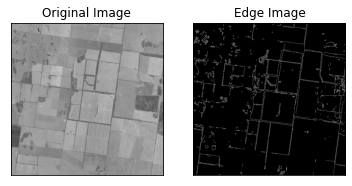

In [3]:
plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])
plt.show()

# Keras DenseNet example

The following a DenseNet trained on the CIFAR10 Image data set

In [4]:
import tensorflow as tf
from tensorflow import keras
from keras.datasets import mnist
from keras.models import Model
from keras.layers import Dense, Dropout, Flatten, GlobalAveragePooling2D
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras import backend as K
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.applications.densenet import preprocess_input
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import ImageDataGenerator,img_to_array

Following code derived from https://github.com/champstank/MNIST_DeepNet
Initialize settings

In [5]:
batch_size = 128
num_classes = 2
epochs = 12

# input image dimensions
img_rows, img_cols = 32, 32
channels = 3
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

In [6]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


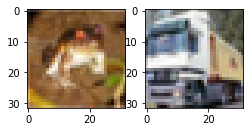

In [7]:
# Preview
for i in range(0,2):
    plt.subplot(1,3,i+1)
    plt.imshow(np.squeeze(x_train[i]), cmap='gray')

In [8]:
model_d=DenseNet121(weights='imagenet',include_top=False, input_shape=(32, 32, 3)) 

x=model_d.output

x= GlobalAveragePooling2D()(x)
x= BatchNormalization()(x)
x= Dropout(0.5)(x)
x= Dense(1024,activation='relu')(x) 
x= Dense(512,activation='relu')(x) 
x= BatchNormalization()(x)
x= Dropout(0.5)(x)

preds=Dense(10,activation='softmax')(x) #FC-layer

model=Model(inputs=model_d.input,outputs=preds)

Avoid overfitting, make some of the layers untrainable

In [9]:
for layer in model.layers[:-8]:
    layer.trainable=False
    
for layer in model.layers[-8:]:
    layer.trainable=True

In [10]:
model.compile(optimizer='Adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

anne = ReduceLROnPlateau(monitor='val_accuracy', factor=0.5, patience=5, verbose=1, min_lr=1e-3)
checkpoint = ModelCheckpoint('model.h5', verbose=1, save_best_only=True)

print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [11]:
# Fits-the-model
history = model.fit(x_train, y_train,
                batch_size=50,
                epochs=50,
                verbose=2,
                callbacks=[anne, checkpoint],
                validation_split=0.2)

Epoch 1/50

Epoch 1: val_loss improved from inf to 1.11779, saving model to model.h5
800/800 - 26s - loss: 1.5671 - accuracy: 0.4846 - val_loss: 1.1178 - val_accuracy: 0.6088 - lr: 0.0010 - 26s/epoch - 33ms/step
Epoch 2/50

Epoch 2: val_loss improved from 1.11779 to 1.05197, saving model to model.h5
800/800 - 17s - loss: 1.2439 - accuracy: 0.5623 - val_loss: 1.0520 - val_accuracy: 0.6256 - lr: 0.0010 - 17s/epoch - 22ms/step
Epoch 3/50

Epoch 3: val_loss improved from 1.05197 to 1.04777, saving model to model.h5
800/800 - 18s - loss: 1.1776 - accuracy: 0.5852 - val_loss: 1.0478 - val_accuracy: 0.6279 - lr: 0.0010 - 18s/epoch - 22ms/step
Epoch 4/50

Epoch 4: val_loss improved from 1.04777 to 0.99154, saving model to model.h5
800/800 - 18s - loss: 1.1360 - accuracy: 0.6010 - val_loss: 0.9915 - val_accuracy: 0.6535 - lr: 0.0010 - 18s/epoch - 22ms/step
Epoch 5/50

Epoch 5: val_loss improved from 0.99154 to 0.97192, saving model to model.h5
800/800 - 18s - loss: 1.1038 - accuracy: 0.6116 - v

In [12]:
## Print out result metrics

Test loss: 1.0609537363052368 / Test accuracy: 0.6773999929428101


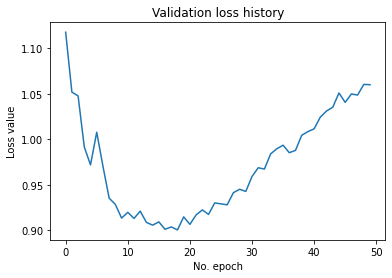

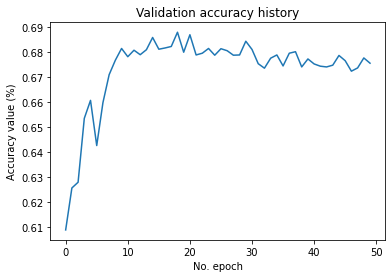

In [13]:
# Generate generalization metrics
score = model.evaluate(x_test, y_test, verbose=0)
print(f'Test loss: {score[0]} / Test accuracy: {score[1]}')

# Visualize history
# Plot history: Loss
plt.plot(history.history['val_loss'])
plt.title('Validation loss history')
plt.ylabel('Loss value')
plt.xlabel('No. epoch')
plt.show()

# Plot history: Accuracy
plt.plot(history.history['val_accuracy'])
plt.title('Validation accuracy history')
plt.ylabel('Accuracy value (%)')
plt.xlabel('No. epoch')
plt.show()

In [14]:
## Load the best saved model and test it

In [15]:
from tensorflow.keras.models import load_model

model = load_model('model.h5')
scores = model.evaluate(x_test, y_test, verbose=1)

print(f'Score: {model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')

313/313 [==============================] - 7s 17ms/step - loss: 0.9152 - accuracy: 0.6829
Score: loss of 0.9152137637138367; accuracy of 68.29000115394592%


In [16]:
print(model.predict(y_test[0]))

ValueError: in user code:

    File "C:\Python310\lib\site-packages\keras\engine\training.py", line 1801, in predict_function  *
        return step_function(self, iterator)
    File "C:\Python310\lib\site-packages\keras\engine\training.py", line 1790, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Python310\lib\site-packages\keras\engine\training.py", line 1783, in run_step  **
        outputs = model.predict_step(data)
    File "C:\Python310\lib\site-packages\keras\engine\training.py", line 1751, in predict_step
        return self(x, training=False)
    File "C:\Python310\lib\site-packages\keras\utils\traceback_utils.py", line 67, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\Python310\lib\site-packages\keras\engine\input_spec.py", line 214, in assert_input_compatibility
        raise ValueError(f'Input {input_index} of layer "{layer_name}" '

    ValueError: Exception encountered when calling layer "model" (type Functional).
    
    Input 0 of layer "zero_padding2d" is incompatible with the layer: expected ndim=4, found ndim=1. Full shape received: (None,)
    
    Call arguments received:
      • inputs=tf.Tensor(shape=(None,), dtype=uint8)
      • training=False
      • mask=None
